Polynomial Regression

importing the libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the Data set

In [68]:
df=pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [69]:
x=df.iloc[:,1:-1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [70]:
y=df.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Training the Linear Regression Model on Whole Data Set

In [71]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(x,y)

LinearRegression()

Training the Polynomial Regression Model on Data Set

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
print(x_poly)
lin2=LinearRegression()
lin2.fit(x_poly,y)
#! this is now a polynomial regression model

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

Visualiztion of Results Using Linear Regression

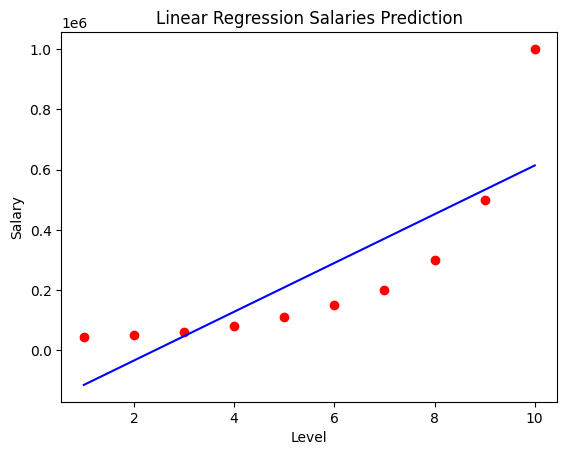

In [73]:
plt.scatter(x,y ,color='red')
# y_pred=lin.predict(x)
# plt.plot(x,y_pred,color='green')
plt.plot(x, lin.predict(x), color='blue')
plt.title("Linear Regression Salaries Prediction")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Visualiztion of Results Using Polynomial Regression

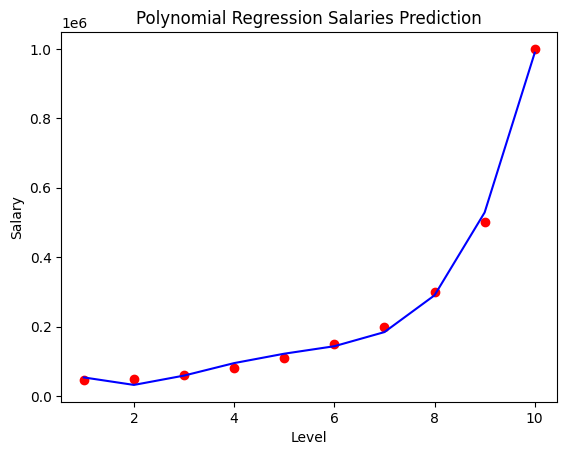

In [74]:
plt.scatter(x,y ,color='red')
# y_pred2=lin2.predict(x_poly)
# plt.plot(x,y_pred2 ,color='green')
plt.plot(x,lin2.predict(x_poly) ,color='blue')
plt.title("Polynomial Regression Salaries Prediction")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Visualiztion of Results Using Polynomial Regression for better results

C:\Users\91995\AppData\Local\Temp\ipykernel_8892\1980577850.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.1)


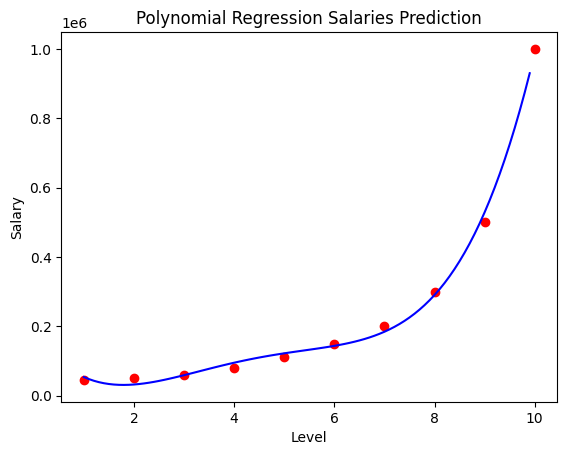

In [80]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
#! increasing the number of values in x in order to get more points in x and smoother graph
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, lin2.predict(poly.fit_transform(X_grid)), color = 'blue')
plt.title("Polynomial Regression Salaries Prediction")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Predicting New Results with Linear Regession

In [86]:
lin.predict([[6.5]])

array([330378.78787879])

Predicting New Results with Polynomial Regession

In [88]:
lin2.predict(poly.fit_transform([[6.5]]))

array([158862.45265155])

Information About Linear Regession Model

In [92]:
print(lin.intercept_)
print(lin.coef_)

-195333.33333333337
[80878.78787879]


Information About Polynomial Regession Model

In [93]:
print(lin2.intercept_)
print(lin2.coef_)

184166.66666719783
[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]


R2 score for Linear Regression Model

In [89]:
from sklearn.metrics import r2_score
r2_score(y,lin.predict(x))

0.6690412331929895

R2 score for Polynomial Regression Model

In [90]:
r2_score(y,lin2.predict(x_poly))

0.9973922891706614